# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [63]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

# 2. Collect and load data

In [64]:
df = pd.read_csv('bigcity+(3).csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [65]:
df.describe().tail(5)

,u,x
min,2.0,46.0
25%,43.0,58.0
50%,64.0,79.0
75%,120.0,130.0
max,507.0,634.0


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

<AxesSubplot:>

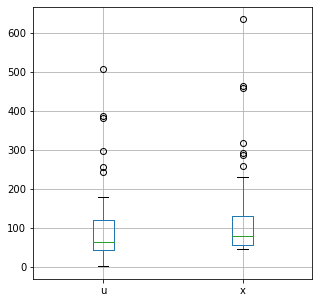

In [66]:
plt.figure(figsize=(5,5))
df.boxplot()

array([[<AxesSubplot:title={'center':'u'}>,
        <AxesSubplot:title={'center':'x'}>]], dtype=object)

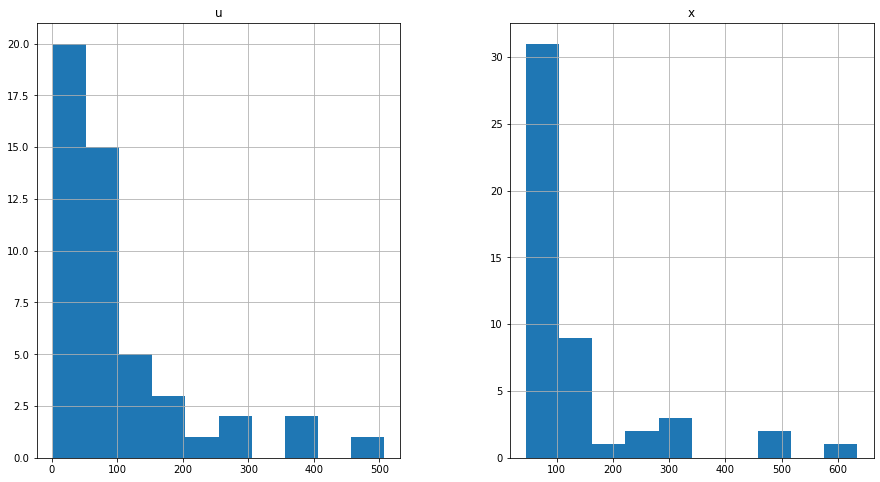

In [67]:
df.hist()

In [68]:
print(df.u.var())
print(df.x.var())

10900.416666666662
15158.832482993197


In [69]:
print(df.u.std())
print(df.x.std())

104.40506054146351
123.12121053252034


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

<AxesSubplot:xlabel='u', ylabel='x'>

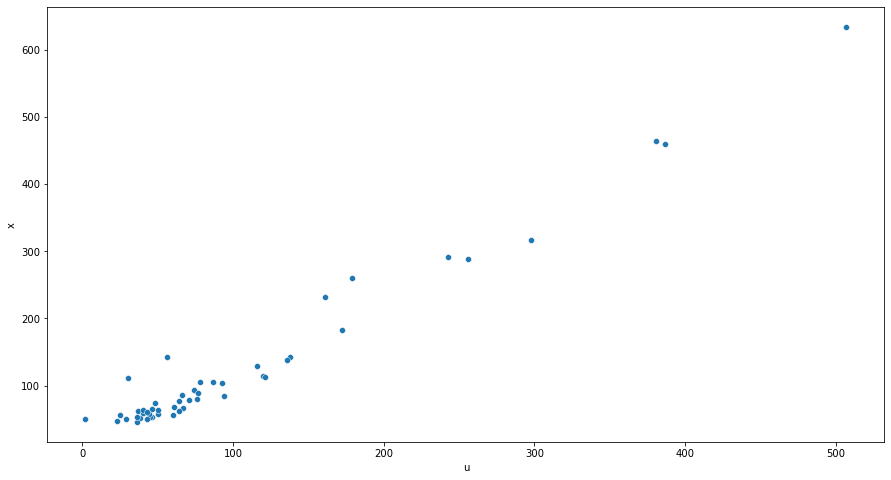

In [70]:
sns.scatterplot(df.u,df.x)

In [71]:
pd.crosstab(df.u,df.x)

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [72]:
# split into inputs and outputs
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# summarize dataset
print(X.shape, y.shape)

(49, 1) (49,)


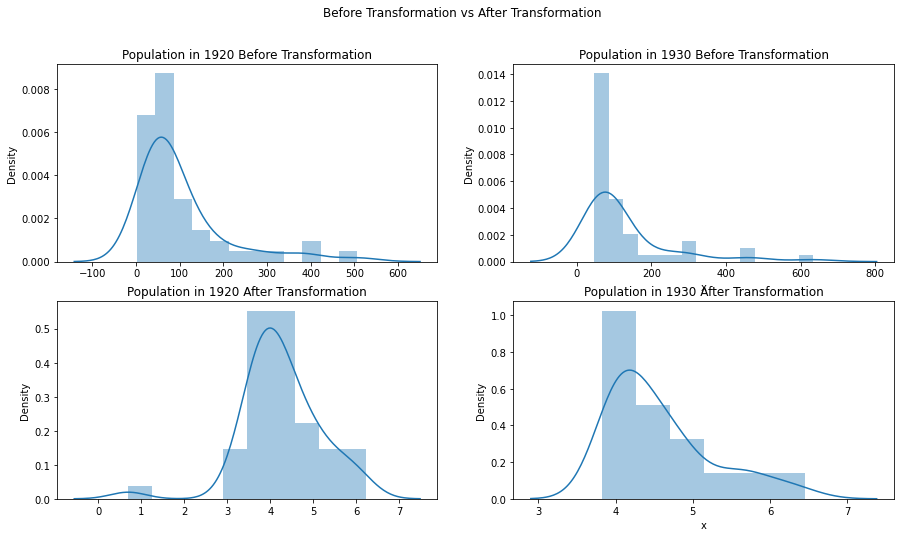

In [73]:
fig, axes = plt.subplots(2,2,figsize=(15,8))
fig.suptitle('Before Transformation vs After Transformation')
sns.distplot(X,ax=axes[0,0]).set_title("Population in 1920 Before Transformation")
sns.distplot(y,ax=axes[0,1]).set_title("Population in 1930 Before Transformation")
sns.distplot(np.log(X),ax=axes[1,0]).set_title("Population in 1920 After Transformation")
sns.distplot(np.log(y),ax=axes[1,1]).set_title("Population in 1930 After Transformation")
plt.show()

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [74]:
df.isna().sum()

u    0
x    0
dtype: int64

In [75]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


<AxesSubplot:>

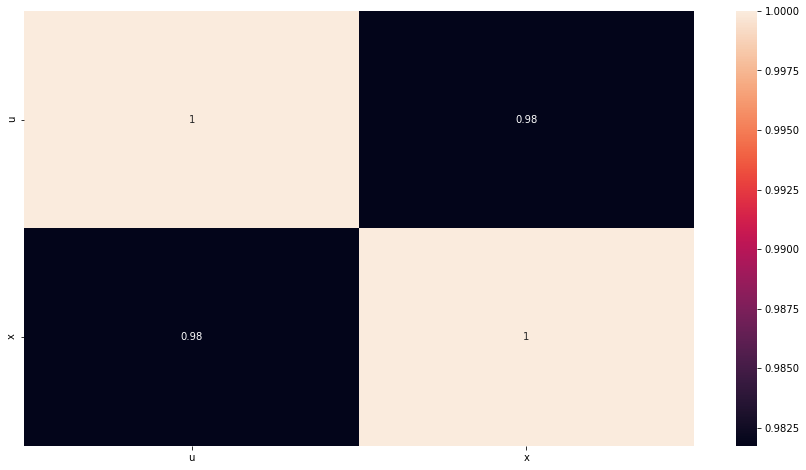

In [76]:
sns.heatmap(df.corr(),annot=True)

The high correlation between u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [77]:
import statsmodels.api as sm
X=df.u
X=sm.add_constant(X)
y=df.x

# train test split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=1,test_size=0.20)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(39, 2)
(10, 2)
(39,)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [78]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)
print(" Intercept is   : ",regressor.intercept_)
print("Coefficients is :",regressor.coef_)

 Intercept is   :  9.718455322828262
Coefficients is : [0.         1.15945123]


In [79]:
y_pred = regressor.predict(Xtest)
y_pred

array([167.40382318, 148.85260343,  60.73430963,  51.45869975,
        80.44498061, 217.26022625,  56.09650469, 306.53797128,
        59.57485839, 118.70687134])

In [80]:
df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df1

,Actual,Predicted
27,139,167.403823
34,115,148.852603
39,58,60.734310
48,54,51.458700
2,69,80.444981
3,260,217.260226
42,64,56.096505
29,288,306.537971
45,61,59.574858
30,85,118.706871


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

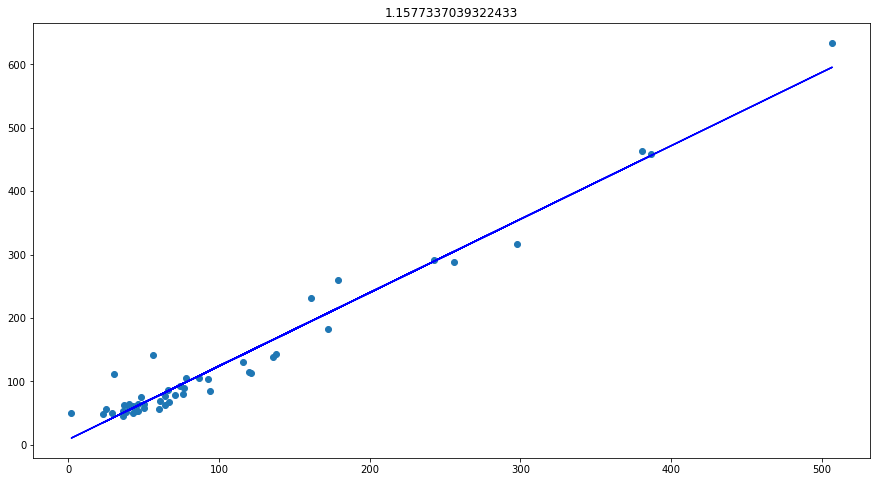

In [81]:
slope, intercept = np.polyfit(df.u, df.x, 1)
x = df.u
y = df.x
# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]

# Plot the best fit line over the actual values
plt.plot(x, y, 'o')
plt.plot(x, abline_values, 'b')
plt.title(slope)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [82]:
from sklearn.linear_model import LinearRegression
base_model=LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error
base_model.fit(Xtrain,ytrain)
y_pred=base_model.predict(Xtest)
print('R2 score of the base model is',r2_score(ytest,y_pred))
mse=mean_squared_error(ytest,y_pred)
rmse=np.sqrt(mse)
print('MSE score of the base model is',mse)
y_pred_train=base_model.predict(Xtrain)
mse=mean_squared_error(ytrain,y_pred_train)
rmse=np.sqrt(mse)
print('RMSE score of the base model is',rmse)

R2 score of the base model is 0.9181922560396981
MSE score of the base model is 546.869224903266
RMSE score of the base model is 23.18943724391406


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [83]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(max_iter = 1000)
regression.fit(Xtrain, ytrain )
print("Train Accuracy Score:",regression.score(Xtrain, ytrain))
print("Test Accuracy Score :",regression.score(Xtest, ytest))

Train Accuracy Score: 0.4358974358974359
Test Accuracy Score : 0.0
